# WHO DASHBOARD COVID-19


## STATE ALLOCATED-TELANGANA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [14]:
data_set=pd.read_csv("pandemic_data_set.csv")

In [15]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 41 columns):
Date      90 non-null object
Status    90 non-null object
TT        90 non-null int64
AN        90 non-null int64
AP        90 non-null int64
AR        90 non-null int64
AS        90 non-null int64
BR        90 non-null int64
CH        90 non-null int64
CT        90 non-null int64
DN        90 non-null int64
DD        90 non-null int64
DL        90 non-null int64
GA        90 non-null int64
GJ        90 non-null int64
HR        90 non-null int64
HP        90 non-null int64
JK        90 non-null int64
JH        90 non-null int64
KA        90 non-null int64
KL        90 non-null int64
LA        90 non-null int64
LD        90 non-null int64
MP        90 non-null int64
MH        90 non-null int64
MN        90 non-null int64
ML        90 non-null int64
MZ        90 non-null int64
NL        90 non-null int64
OR        90 non-null int64
PY        90 non-null int64
PB        90 non-null int64

In [16]:
data_set.describe()

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,7366.966667,0.844444,170.222222,2.766667,138.177778,136.111111,3.488889,50.088889,3.266667,0.0,...,58.711111,195.377778,1.533333,1179.733333,218.722222,22.188889,301.533333,45.988889,259.800000,16.811111
std,6027.420084,2.253143,203.655017,4.998989,131.182657,113.752486,6.582654,48.718555,5.162092,0.0,...,65.196375,144.332760,5.771297,1106.066741,327.350928,33.319325,245.564985,43.622099,206.407919,302.228610
min,201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-1.000000,1.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,8.000000,-1295.000000
25%,404.250000,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,...,5.250000,9.250000,0.000000,48.250000,7.000000,0.000000,20.000000,2.000000,13.250000,0.000000
50%,7540.500000,0.000000,112.500000,0.500000,150.000000,148.000000,1.000000,45.500000,0.000000,0.0,...,33.000000,237.000000,0.000000,1114.500000,87.500000,7.000000,319.000000,39.500000,319.000000,0.000000
75%,11380.250000,0.000000,219.000000,4.000000,220.250000,225.250000,5.000000,87.750000,5.000000,0.0,...,97.500000,304.500000,0.000000,1914.000000,242.250000,33.750000,513.000000,77.500000,434.750000,0.000000
max,20142.000000,14.000000,813.000000,32.000000,613.000000,394.000000,51.000000,165.000000,20.000000,0.0,...,238.000000,505.000000,50.000000,3949.000000,1712.000000,151.000000,809.000000,186.000000,652.000000,874.000000


In [17]:
data_set.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,1-Jun-20,Confirmed,7723,0,105,18,146,138,4,49,...,38,269,0,1162,94,107,286,52,271,139
1,1-Jun-20,Recovered,3882,0,34,0,99,221,15,7,...,13,181,0,413,63,0,187,120,149,0
2,1-Jun-20,Deceased,201,0,2,0,0,0,0,0,...,-1,5,0,11,6,0,5,0,8,0
3,2-Jun-20,Confirmed,8812,0,115,2,74,151,4,15,...,41,273,0,1091,99,48,368,84,396,784
4,2-Jun-20,Recovered,4531,0,40,0,53,62,0,9,...,17,222,0,536,35,0,146,30,104,0


In [18]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 41 columns):
Date      90 non-null object
Status    90 non-null object
TT        90 non-null int64
AN        90 non-null int64
AP        90 non-null int64
AR        90 non-null int64
AS        90 non-null int64
BR        90 non-null int64
CH        90 non-null int64
CT        90 non-null int64
DN        90 non-null int64
DD        90 non-null int64
DL        90 non-null int64
GA        90 non-null int64
GJ        90 non-null int64
HR        90 non-null int64
HP        90 non-null int64
JK        90 non-null int64
JH        90 non-null int64
KA        90 non-null int64
KL        90 non-null int64
LA        90 non-null int64
LD        90 non-null int64
MP        90 non-null int64
MH        90 non-null int64
MN        90 non-null int64
ML        90 non-null int64
MZ        90 non-null int64
NL        90 non-null int64
OR        90 non-null int64
PY        90 non-null int64
PB        90 non-null int64

## Telangana Dashboard

In [20]:
tel_frame=data_set[['Date','Status','TG']]

In [21]:
tel_frame

,Date,Status,TG
0,1-Jun-20,Confirmed,94
1,1-Jun-20,Recovered,63
2,1-Jun-20,Deceased,6
3,2-Jun-20,Confirmed,99
4,2-Jun-20,Recovered,35
5,2-Jun-20,Deceased,4
6,3-Jun-20,Confirmed,129
7,3-Jun-20,Recovered,30
8,3-Jun-20,Deceased,7
9,4-Jun-20,Confirmed,127


In [22]:
tel_framec=tel_frame[tel_frame['Status']=='Confirmed']
tel_framer=tel_frame[tel_frame['Status']=='Recovered']
tel_framed=tel_frame[tel_frame['Status']=='Deceased']

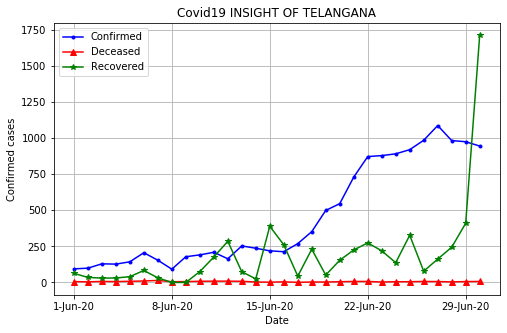

In [29]:
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(tel_framec.Date,tel_framec.TG,'b.-',label="Confirmed")
plt.plot(tel_framed.Date,tel_framed.TG,'r^-',label="Deceased")
plt.plot(tel_framer.Date,tel_framer.TG,'g*-',label="Recovered")
plt.title("Covid19 INSIGHT OF TELANGANA")
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.legend()
plt.xticks(tel_framec.Date[0:30:7].tolist())
plt.show()

In [24]:
c=tel_framec.TG.sum()
d=tel_framed.TG.sum()
r=tel_framer.TG.sum()
a=(c)-(d+r)
covid_insight=[c,d,r,a]
inp=['Confirmed','casualties','Recovered','Active']

Text(0.5, 1.0, 'PROPORTION INSIGHT OF TELANGANA')

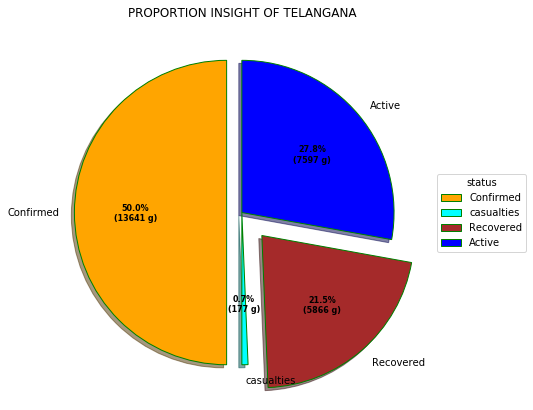

In [26]:
# Creating explode data 
explode = (0.1, 0.0, 0.2,0.0) 
  
# Creating color parameters 
colors = ( "orange", "cyan", "brown","blue") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(covid_insight,  
                                  autopct = lambda pct: func(pct,covid_insight), 
                                  explode = explode,  
                                  labels = inp, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, inp, 
          title ="status", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("PROPORTION INSIGHT OF TELANGANA") 

## DELHI DASHBOARD

In [28]:
dl_frame=data_set[['Date','Status','DL']]

In [30]:
dl_framec=dl_frame[dl_frame['Status']=='Confirmed']
dl_framer=dl_frame[dl_frame['Status']=='Recovered']
dl_framed=dl_frame[dl_frame['Status']=='Deceased']

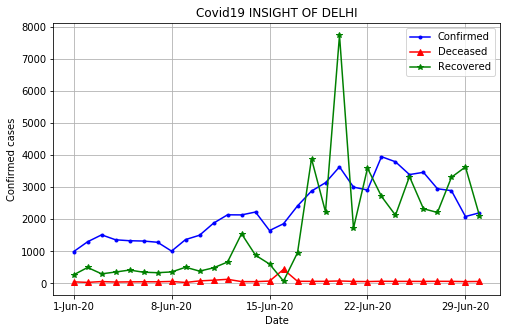

In [32]:
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(dl_framec.Date,dl_framec.DL,'b.-',label="Confirmed")
plt.plot(dl_framed.Date,dl_framed.DL,'r^-',label="Deceased")
plt.plot(dl_framer.Date,dl_framer.DL,'g*-',label="Recovered")
plt.title("Covid19 INSIGHT OF DELHI")
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.legend()
plt.xticks(tel_framec.Date[0:30:7].tolist())
plt.show()

In [34]:
e=dl_framec.DL.sum()
f=dl_framed.DL.sum()
g=dl_framer.DL.sum()
h=(e)-(g+f)
covid_insight=[e,f,g,h]
inp1=['Confirmed','casualties','Recovered','Active']

Text(0.5, 1.0, 'PROPORTION INSIGHT OF DELHI')

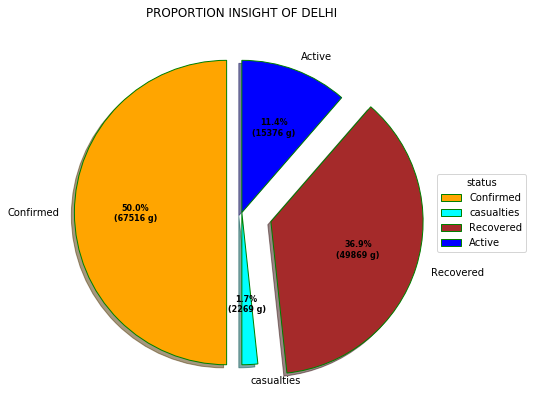

In [35]:
# Creating explode data 
explode = (0.1, 0.0, 0.2,0.0) 
  
# Creating color parameters 
colors = ( "orange", "cyan", "brown","blue") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(covid_insight,  
                                  autopct = lambda pct: func(pct,covid_insight), 
                                  explode = explode,  
                                  labels = inp1, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, inp1, 
          title ="status", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("PROPORTION INSIGHT OF DELHI") 

## B. CORRELATION HEAT MAP FOR VARIOUS PARAMETER

In [36]:
covid_frame=pd.read_csv("covid_19_india.csv")

In [37]:
covid_frame['Mortality Rate'] = (covid_frame['Confirmed']/covid_frame['Deaths']).round(2)

In [38]:
covid_frame['Recovery Rate'] = (covid_frame['Cured']/covid_frame['Confirmed']).round(2)

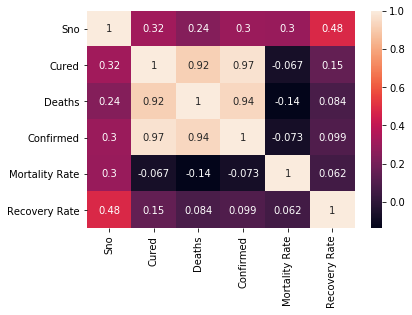

In [39]:
sns.heatmap(covid_frame.corr(),annot=True)

In [40]:
covid_frame.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True)


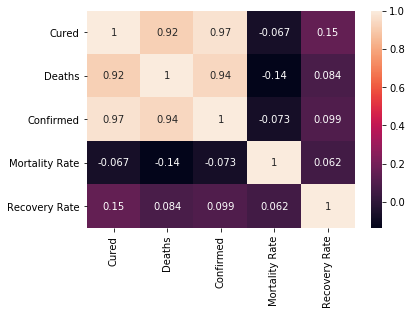

In [41]:
sns.heatmap(covid_frame.corr(),annot=True)

## C.PREDICTION OF CASES AFTER OR ON 15 JULY

In [43]:
data_set

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,1-Jun-20,Confirmed,7723,0,105,18,146,138,4,49,...,38,269,0,1162,94,107,286,52,271,139
1,1-Jun-20,Recovered,3882,0,34,0,99,221,15,7,...,13,181,0,413,63,0,187,120,149,0
2,1-Jun-20,Deceased,201,0,2,0,0,0,0,0,...,-1,5,0,11,6,0,5,0,8,0
3,2-Jun-20,Confirmed,8812,0,115,2,74,151,4,15,...,41,273,0,1091,99,48,368,84,396,784
4,2-Jun-20,Recovered,4531,0,40,0,53,62,0,9,...,17,222,0,536,35,0,146,30,104,0
5,2-Jun-20,Deceased,222,0,0,0,0,1,1,1,...,2,4,0,13,4,0,7,2,10,0
6,3-Jun-20,Confirmed,9689,0,180,10,271,230,0,64,...,34,279,1,1286,129,151,141,42,340,709
7,3-Jun-20,Recovered,3789,0,50,0,76,222,0,40,...,12,309,0,610,30,0,81,7,170,0
8,3-Jun-20,Deceased,259,0,4,0,0,1,0,0,...,1,6,0,8,7,0,1,1,10,0
9,4-Jun-20,Confirmed,9847,0,141,5,285,126,1,147,...,39,210,0,1384,127,24,367,68,368,360


In [44]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 41 columns):
Date      90 non-null object
Status    90 non-null object
TT        90 non-null int64
AN        90 non-null int64
AP        90 non-null int64
AR        90 non-null int64
AS        90 non-null int64
BR        90 non-null int64
CH        90 non-null int64
CT        90 non-null int64
DN        90 non-null int64
DD        90 non-null int64
DL        90 non-null int64
GA        90 non-null int64
GJ        90 non-null int64
HR        90 non-null int64
HP        90 non-null int64
JK        90 non-null int64
JH        90 non-null int64
KA        90 non-null int64
KL        90 non-null int64
LA        90 non-null int64
LD        90 non-null int64
MP        90 non-null int64
MH        90 non-null int64
MN        90 non-null int64
ML        90 non-null int64
MZ        90 non-null int64
NL        90 non-null int64
OR        90 non-null int64
PY        90 non-null int64
PB        90 non-null int64

In [45]:
data=pd.read_csv("state_wise_daily.csv")

In [46]:
data

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
5,15-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16-Mar-20,Confirmed,15,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,16-Mar-20,Recovered,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,16-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17-Mar-20,Confirmed,11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 41 columns):
Date      360 non-null object
Status    360 non-null object
TT        360 non-null int64
AN        360 non-null int64
AP        360 non-null int64
AR        360 non-null int64
AS        360 non-null int64
BR        360 non-null int64
CH        360 non-null int64
CT        360 non-null int64
DN        360 non-null int64
DD        360 non-null int64
DL        360 non-null int64
GA        360 non-null int64
GJ        360 non-null int64
HR        360 non-null int64
HP        360 non-null int64
JK        360 non-null int64
JH        360 non-null int64
KA        360 non-null int64
KL        360 non-null int64
LA        360 non-null int64
LD        360 non-null int64
MP        360 non-null int64
MH        360 non-null int64
MN        360 non-null int64
ML        360 non-null int64
MZ        360 non-null int64
NL        360 non-null int64
OR        360 non-null int64
PY        360 non-null 

In [53]:

data.drop(columns=['Date'],inplace=True)

In [54]:
data['Status'] = data['Status'].replace("Confirmed", "0")
data['Status'] = data['Status'].replace("Recovered", "1")
data['Status'] = data['Status'].replace("Deceased", "2")

In [56]:
data.columns



Index(['Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [129]:
x = data[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']] .values  
x[0:5]
y = data['Status'].values
y[0:5]

array(['0', '1', '2', '0', '1'], dtype=object)

In [167]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)
k = 3
nip= KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

Train set: (288, 39) (288,)
Test set: (72, 39) (72,)


In [168]:
y_predict = nip.predict(x_test)  # predicting 9 state with respect to 15 july
y_predict[0:5]

array(['1', '2', '2', '2', '1'], dtype=object)

In [169]:
score = nip.score(x_test, y_test)
print("Model accuracy is {}".format(score.round(2)))

Model accuracy is 0.69
